In [1]:
%matplotlib inline


PyTorch: optim
--------------

A fully-connected ReLU network with one hidden layer, trained to predict y from x
by minimizing squared Euclidean distance.

This implementation uses the nn package from PyTorch to build the network.

Rather than manually updating the weights of the model as we have been doing,
we use the optim package to define an Optimizer that will update the weights
for us. The optim package defines many optimization algorithms that are commonly
used for deep learning, including SGD+momentum, RMSProp, Adam, etc.



In [71]:
import torch
from torch.autograd import Variable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_table('ALL_AWAY_CLOSE.txt',header=None)
data_np=data.values
data_in_np=data_np[:,1:-1]
data_label_np=data_np[:,0]
data_in_np_float=data_in_np.astype(np.float32)
data_label_np_float=data_label_np.astype(np.float32)
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
H,H_2, D_out = 1000,10, 1
N=data.shape[0]
D_in=data.shape[1]-2
# Create random Tensors to hold inputs and outputs, and wrap them in Variables.
x = Variable(torch.from_numpy(data_in_np_float))
y = Variable(torch.from_numpy(data_label_np_float), requires_grad=False)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H_2),
    torch.nn.ReLU(),
    torch.nn.Linear(H_2, D_out),
)
loss_fn = torch.nn.MSELoss(size_average=False)

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Variables it should update.
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [72]:
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

0 23142.35546875
1 18828.419921875
2 15902.5322265625
3 14161.626953125
4 13325.3046875
5 12994.146484375
6 12826.69140625
7 12613.0693359375
8 12260.185546875
9 11772.5966796875
10 11203.919921875
11 10603.05859375
12 10026.580078125
13 9512.4951171875
14 9084.1123046875
15 8736.37109375
16 8461.8017578125
17 8254.4794921875
18 8087.81103515625
19 7935.97119140625
20 7769.71630859375
21 7575.7509765625
22 7351.9619140625
23 7107.76416015625
24 6856.2470703125
25 6613.31103515625
26 6390.2421875
27 6191.6640625
28 6017.88623046875
29 5864.322265625
30 5724.28271484375
31 5589.25927734375
32 5452.5009765625
33 5309.54296875
34 5161.0244140625
35 5010.19677734375
36 4861.357421875
37 4720.7685546875
38 4590.5068359375
39 4471.228515625
40 4362.79931640625
41 4260.63623046875
42 4160.9013671875
43 4059.760498046875
44 3955.98486328125
45 3851.15087890625
46 3748.921875
47 3652.452392578125
48 3562.460205078125
49 3477.636474609375
50 3396.839111328125
51 3317.782470703125
52 3239.52539062

382 36.66114807128906
383 36.25113296508789
384 35.846370697021484
385 35.443756103515625
386 35.04709243774414
387 34.65387725830078
388 34.26974868774414
389 33.88536834716797
390 33.509132385253906
391 33.13532638549805
392 32.76430130004883
393 32.397377014160156
394 32.03329086303711
395 31.676528930664062
396 31.323688507080078
397 30.97317123413086
398 30.627960205078125
399 30.287065505981445
400 29.947887420654297
401 29.61359977722168
402 29.2843074798584
403 28.95578384399414
404 28.6342830657959
405 28.31270408630371
406 27.999670028686523
407 27.686756134033203
408 27.377355575561523
409 27.072933197021484
410 26.771982192993164
411 26.472768783569336
412 26.17786407470703
413 25.886611938476562
414 25.599538803100586
415 25.3138484954834
416 25.032608032226562
417 24.755191802978516
418 24.47920799255371
419 24.205686569213867
420 23.937774658203125
421 23.67249870300293
422 23.40962028503418
423 23.151365280151367
424 22.89502716064453
425 22.64142608642578
426 22.390703

In [68]:
whos

Variable              Type          Data/Info
---------------------------------------------
D_in                  int           45
D_out                 int           1
H                     int           1000
H_2                   int           10
N                     int           3622
Variable              type          <class 'torch.autograd.variable.Variable'>
data                  DataFrame           0       1       2  <...>n[3622 rows x 47 columns]
data_in_np            ndarray       3622x45: 162990 elems, type `float64`, 1303920 bytes (1.2435150146484375 Mb)
data_in_np_float      ndarray       3622x45: 162990 elems, type `float32`, 651960 bytes (636.6796875 kb)
data_label_np         ndarray       3622: 3622 elems, type `float64`, 28976 bytes
data_label_np_float   ndarray       3622: 3622 elems, type `float32`, 14488 bytes
data_np               ndarray       3622x47: 170234 elems, type `float64`, 1361872 bytes (1.2987823486328125 Mb)
learning_rate         float         0.0001
l

In [61]:
data_in_np_float.shape

(902, 45)

In [62]:
data_label_np_float.shape

(902,)

In [63]:
y_pred

Variable containing:
 7.9697
 8.0152
 7.9924
 7.9897
 8.0150
 8.0071
 8.0011
 8.0475
 8.0644
 8.0259
 7.9988
 7.9675
 7.9940
 7.9988
 8.0184
 7.9892
 7.9838
 8.0250
 7.9949
 7.9966
 7.9607
 7.9832
 7.9587
 8.0178
 8.0027
 7.9831
 8.0377
 8.0018
 8.0388
 7.9557
 7.9662
 7.9614
 7.9713
 7.9907
 8.0373
 7.9885
 7.9840
 7.9813
 7.9997
 7.9964
 7.9863
 8.0079
 8.0236
 8.0131
 8.0355
 7.9523
 8.0216
 8.0287
 8.0632
 8.0151
 7.9772
 7.9910
 8.0201
 8.0096
 8.0181
 7.9648
 7.9687
 7.9283
 7.9747
 8.0025
 8.0005
 8.0413
 7.9929
 8.0305
 7.9848
 8.0095
 7.9190
 7.9168
 7.9474
 7.9979
 8.0304
 8.0051
 7.8368
 7.9849
 7.9919
 8.0069
 8.0109
 8.0104
 8.0545
 8.1357
 7.9871
 7.9666
 7.9939
 7.9789
 7.9900
 7.9865
 7.9647
 8.0271
 8.0087
 7.9786
 8.0292
 7.9072
 8.0025
 8.0164
 8.0116
 8.0222
 7.9251
 7.9764
 8.0156
 7.9922
 8.0010
 8.0213
 8.0231
 7.9905
 8.0114
 8.0032
 8.0164
 7.9990
 8.0025
 7.9945
 7.7063
 7.9993
 7.8831
 7.9605
 8.0087
 8.0271
 8.0258
 8.0937
 8.0143
 8.0170
 8.0318
 8.0134
 8.

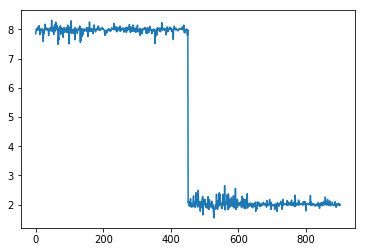

In [73]:
plt.plot(y_pred.data.numpy())

In [50]:
y_pred.data.numpy()

array([[7.8896675 ],
       [7.5868564 ],
       [8.424839  ],
       [8.104802  ],
       [7.811514  ],
       [8.303604  ],
       [8.200313  ],
       [7.9633565 ],
       [8.238647  ],
       [8.139641  ],
       [7.8839154 ],
       [8.078801  ],
       [8.011041  ],
       [8.126596  ],
       [8.18794   ],
       [8.175691  ],
       [8.623671  ],
       [7.9817853 ],
       [8.511984  ],
       [7.917117  ],
       [8.118195  ],
       [7.9786425 ],
       [7.6948624 ],
       [8.063202  ],
       [8.198866  ],
       [7.6238613 ],
       [8.699751  ],
       [8.445524  ],
       [8.148626  ],
       [7.6776237 ],
       [7.6283646 ],
       [8.262016  ],
       [8.533821  ],
       [7.8952436 ],
       [8.034827  ],
       [7.444127  ],
       [8.111569  ],
       [8.220085  ],
       [7.927175  ],
       [7.844944  ],
       [7.972655  ],
       [8.288254  ],
       [8.3067875 ],
       [7.8996944 ],
       [7.7741756 ],
       [8.266089  ],
       [8.038089  ],
       [8.390

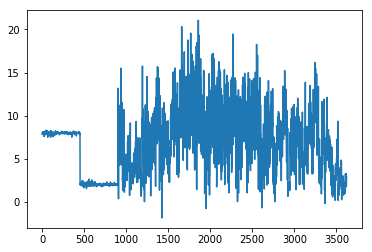

In [74]:
data=pd.read_table('ALL.txt',header=None)
data_np=data.values
data_in_np=data_np[:,1:-1]
data_label_np=data_np[:,0]
data_in_np_float=data_in_np.astype(np.float32)
data_label_np_float=data_label_np.astype(np.float32)
x = Variable(torch.from_numpy(data_in_np_float))
y_pred = model(x)
plt.plot(y_pred.data.numpy())